In [70]:
import pandas as pd

main_df = pd.read_csv(r'anime-dataset-2023.csv')
secondary_df = pd.read_csv(r'anime.csv')

In [71]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24905 non-null  int64 
 1   Name          24905 non-null  object
 2   English name  24905 non-null  object
 3   Other name    24905 non-null  object
 4   Score         24905 non-null  object
 5   Genres        24905 non-null  object
 6   Synopsis      24905 non-null  object
 7   Type          24905 non-null  object
 8   Episodes      24905 non-null  object
 9   Aired         24905 non-null  object
 10  Premiered     24905 non-null  object
 11  Status        24905 non-null  object
 12  Producers     24905 non-null  object
 13  Licensors     24905 non-null  object
 14  Studios       24905 non-null  object
 15  Source        24905 non-null  object
 16  Duration      24905 non-null  object
 17  Rating        24905 non-null  object
 18  Rank          24905 non-null  object
 19  Popu

In [72]:
secondary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24985 entries, 0 to 24984
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   anime_id          24985 non-null  int64  
 1   title             24985 non-null  object 
 2   type              24927 non-null  object 
 3   score             16050 non-null  float64
 4   scored_by         24985 non-null  int64  
 5   status            24985 non-null  object 
 6   episodes          24438 non-null  float64
 7   start_date        24110 non-null  object 
 8   end_date          22215 non-null  object 
 9   source            21424 non-null  object 
 10  members           24985 non-null  int64  
 11  favorites         24985 non-null  int64  
 12  episode_duration  24387 non-null  object 
 13  total_duration    24162 non-null  object 
 14  rating            24405 non-null  object 
 15  sfw               24985 non-null  bool   
 16  approved          24985 non-null  bool  

In [73]:
main_mini = main_df[main_df['Score'] != 'UNKNOWN'][['anime_id', 'Name', 'Genres', 'Rating', 'Type', 'Synopsis', 'Producers', 'Studios']]
secondary_mini = secondary_df[['anime_id', 'themes']]

In [74]:
merged_df = pd.merge(main_mini, secondary_mini, on='anime_id', how='inner')

merged_df

,anime_id,Name,Genres,Rating,Type,Synopsis,Producers,Studios,themes
0,1,Cowboy Bebop,"Action, Award Winning, Sci-Fi",R - 17+ (violence & profanity),TV,"Crime is timeless. By the year 2071, humanity ...",Bandai Visual,Sunrise,"['Adult Cast', 'Space']"
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Sci-Fi",R - 17+ (violence & profanity),Movie,"Another day, another bounty—such is the life o...","Sunrise, Bandai Visual",Bones,"['Adult Cast', 'Space']"
2,6,Trigun,"Action, Adventure, Sci-Fi",PG-13 - Teens 13 or older,TV,"Vash the Stampede is the man with a $$60,000,0...",Victor Entertainment,Madhouse,['Adult Cast']
3,7,Witch Hunter Robin,"Action, Drama, Mystery, Supernatural",PG-13 - Teens 13 or older,TV,Robin Sena is a powerful craft user drafted in...,"Bandai Visual, Dentsu, Victor Entertainment, T...",Sunrise,['Detective']
4,8,Bouken Ou Beet,"Adventure, Fantasy, Supernatural",PG - Children,TV,It is the dark century and the people are suff...,"TV Tokyo, Dentsu",Toei Animation,[]
...,...,...,...,...,...,...,...,...,...
15685,55355,Li Shi Zhentan Shiwusuo: A Day in Lungmen - Ho...,"Action, Comedy, Mystery",PG-13 - Teens 13 or older,ONA,"Infiltrating, disguising, and raiding. Tonight...",UNKNOWN,"HMCH, Gravity Well","['Anthropomorphic', 'Detective']"
15686,55404,Slash,UNKNOWN,PG-13 - Teens 13 or older,Music,Music video for the song Slash by yama.\n\nThe...,MAZRI,UNKNOWN,['Music']
15687,55517,The IDOLM@STER Cinderella Girls: U149 Recap,UNKNOWN,PG-13 - Teens 13 or older,Special,Recap of the first seven episodes of The IDOLM...,UNKNOWN,CygamesPictures,"['Idols (Female)', 'Music']"
15688,55647,One Piece: Dai Gekisen Tokushuu! Hangeki Doume...,"Action, Adventure, Comedy, Fantasy",PG-13 - Teens 13 or older,Special,This is the 8th recap special of the Wano arc.,UNKNOWN,UNKNOWN,[]


In [75]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import ast

# Task 1: Concat themes and genres columns then change it into one hot encoded
# Function to convert string representation of list to comma-separated string
def convert_to_comma_string(themes_string):
    try:
        themes_list = ast.literal_eval(themes_string)
        return ', '.join(map(str, themes_list))
    except (SyntaxError, ValueError):
        return ''  # Handle cases where the string cannot be evaluated as a list

# Apply the function to the 'themes' column
merged_df['themes'] = merged_df['themes'].apply(convert_to_comma_string)

# Concatenate strings from Column1 and Column2, handling empty strings and strings with only spaces
merged_df['themes_genres'] = merged_df.apply(
    lambda row: (
        row['themes'].strip() + ', ' + row['Genres'].strip()
        if (row['themes'].strip() and row['Genres'].strip())
        else row['themes'].strip() + row['Genres'].strip()
    ),
    axis=1
)

# Split the comma-separated genres/themes into lists
merged_df['themes_genres'] = merged_df['themes_genres'].apply(lambda x: x.split(', ') if x else [])

# Use pd.get_dummies to obtain binary matrix
themes_genres_encoded = pd.get_dummies(merged_df['themes_genres'].explode(), prefix='', prefix_sep='')

# Convert boolean values to integers (0 and 1)
themes_genres_encoded = themes_genres_encoded.astype(int)

# Aggregate the results by grouping on the index (level=0) and summing
themes_genres_encoded = themes_genres_encoded.groupby(level=0).max()

# Task 2: Change producers column into one hot encoded
merged_df['Producers'] = merged_df['Producers'].apply(lambda x: x.split(', ') if x else [])
producers_encoded = pd.get_dummies(merged_df['Producers'].explode(), prefix='', prefix_sep='')
producers_encoded = producers_encoded.astype(int)
producers_encoded = producers_encoded.groupby(level=0).max()

# Task 3: Change studios column into one hot encoded
merged_df['Studios'] = merged_df['Studios'].apply(lambda x: x.split(', ') if x else [])
studios_encoded = pd.get_dummies(merged_df['Studios'].explode(), prefix='', prefix_sep='')
studios_encoded = studios_encoded.astype(int)
studios_encoded = studios_encoded.groupby(level=0).max()

# Task 4: Change type column into one hot encoded
type_encoded = pd.get_dummies(merged_df['Type'].explode(), prefix='', prefix_sep='')
type_encoded = type_encoded.astype(int)
type_encoded = type_encoded.groupby(level=0).max()

# Task 5: Change rating column into one hot encoded
rating_encoded = pd.get_dummies(merged_df['Rating'].explode(), prefix='', prefix_sep='')
rating_encoded = rating_encoded.astype(int)
rating_encoded = rating_encoded.groupby(level=0).max()

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import re

In [77]:
def preprocess_text(text):
    # Remove non-ASCII characters and numbers
    text = ''.join([char for char in text if char.isascii() or char.isspace() or char.isalpha()])
    
    # Remove characters from non-English alphabets
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    
    # Tokenize and lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.isalpha()]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    return ' '.join(tokens)

In [78]:
# Apply preprocessing to the 'synopsis' column
merged_df['Synopsis'] = merged_df['Synopsis'].apply(preprocess_text)

merged_df

,anime_id,Name,Genres,Rating,Type,Synopsis,Producers,Studios,themes,themes_genres
0,1,Cowboy Bebop,"Action, Award Winning, Sci-Fi",R - 17+ (violence & profanity),TV,crime timeless year humanity ha expanded acros...,[Bandai Visual],[Sunrise],"Adult Cast, Space","[Adult Cast, Space, Action, Award Winning, Sci..."
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Sci-Fi",R - 17+ (violence & profanity),Movie,another day another bountysuch life often unlu...,"[Sunrise, Bandai Visual]",[Bones],"Adult Cast, Space","[Adult Cast, Space, Action, Sci-Fi]"
2,6,Trigun,"Action, Adventure, Sci-Fi",PG-13 - Teens 13 or older,TV,vash stampede man bounty head reason merciless...,[Victor Entertainment],[Madhouse],Adult Cast,"[Adult Cast, Action, Adventure, Sci-Fi]"
3,7,Witch Hunter Robin,"Action, Drama, Mystery, Supernatural",PG-13 - Teens 13 or older,TV,robin sena powerful craft user drafted stnja g...,"[Bandai Visual, Dentsu, Victor Entertainment, ...",[Sunrise],Detective,"[Detective, Action, Drama, Mystery, Supernatural]"
4,8,Bouken Ou Beet,"Adventure, Fantasy, Supernatural",PG - Children,TV,dark century people suffering rule devil vande...,"[TV Tokyo, Dentsu]",[Toei Animation],,"[Adventure, Fantasy, Supernatural]"
...,...,...,...,...,...,...,...,...,...,...
15685,55355,Li Shi Zhentan Shiwusuo: A Day in Lungmen - Ho...,"Action, Comedy, Mystery",PG-13 - Teens 13 or older,ONA,infiltrating disguising raiding tonight specia...,[UNKNOWN],"[HMCH, Gravity Well]","Anthropomorphic, Detective","[Anthropomorphic, Detective, Action, Comedy, M..."
15686,55404,Slash,UNKNOWN,PG-13 - Teens 13 or older,Music,music video song slash yama song featured musi...,[MAZRI],[UNKNOWN],Music,"[Music, UNKNOWN]"
15687,55517,The IDOLM@STER Cinderella Girls: U149 Recap,UNKNOWN,PG-13 - Teens 13 or older,Special,recap first seven episode idolm ster cinderell...,[UNKNOWN],[CygamesPictures],"Idols (Female), Music","[Idols (Female), Music, UNKNOWN]"
15688,55647,One Piece: Dai Gekisen Tokushuu! Hangeki Doume...,"Action, Adventure, Comedy, Fantasy",PG-13 - Teens 13 or older,Special,recap special wano arc,[UNKNOWN],[UNKNOWN],,"[Action, Adventure, Comedy, Fantasy]"


In [79]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(merged_df['Synopsis'])

# LSA on TF-IDF Matrix and reduce the dimension into 5% of its original size
svd = TruncatedSVD(n_components=round(X.shape[1]*0.05))
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
X_lsa = lsa.fit_transform(X)

# Calculate explained variance
explained_variance = svd.explained_variance_ratio_.sum()

print(f"Reduction to 5% of original size results in: {explained_variance} explained variance of original data" )

Reduction to 5% of original size results in: 0.6071927225085867 explained variance of original data


In [81]:
#Change into dataframe so it can be concacenated
lsa_columns = [f"lsa_component_{i+1}" for i in range(X_lsa.shape[1])]
X_lsa_df = pd.DataFrame(X_lsa, columns=lsa_columns)

X_lsa_df

,lsa_component_1,lsa_component_2,lsa_component_3,lsa_component_4,lsa_component_5,lsa_component_6,lsa_component_7,lsa_component_8,lsa_component_9,lsa_component_10,...,lsa_component_2161,lsa_component_2162,lsa_component_2163,lsa_component_2164,lsa_component_2165,lsa_component_2166,lsa_component_2167,lsa_component_2168,lsa_component_2169,lsa_component_2170
0,0.001905,0.121126,-0.081179,-0.062345,0.005730,-0.023491,-0.013640,-0.001681,-0.004226,0.008435,...,0.012643,0.021318,0.006413,0.030531,-0.024102,-0.006608,-0.034874,-0.025187,-0.011783,0.006152
1,0.001711,0.104880,-0.071695,-0.053194,0.003818,-0.019607,-0.012863,-0.003840,-0.010027,0.007137,...,0.010687,0.049091,-0.000118,0.034079,-0.007695,0.022679,0.005849,0.014585,-0.024523,-0.009111
2,0.001180,0.082096,-0.054047,-0.042084,0.002813,-0.019382,-0.010217,-0.000023,-0.008858,0.006674,...,0.009327,0.012074,-0.011245,-0.003930,0.005249,-0.049810,0.024237,-0.002007,0.015102,0.002268
3,0.001658,0.097554,-0.060832,-0.045996,0.000983,-0.021765,-0.010418,-0.001753,0.001782,0.009222,...,-0.025898,-0.012476,0.006255,0.004135,-0.008180,-0.007411,0.015335,-0.021403,0.013369,-0.013300
4,0.001354,0.089354,-0.052997,-0.045147,0.003357,-0.021659,-0.010190,-0.002136,-0.007708,0.004939,...,0.011729,-0.012198,-0.003149,0.021558,-0.006743,-0.009416,-0.001800,-0.013081,-0.019579,0.012027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15685,0.003146,0.115550,-0.024170,0.093941,-0.117492,-0.061490,-0.096834,0.076605,0.216348,0.146975,...,-0.022970,0.017119,0.006410,-0.020617,-0.023254,0.002799,-0.032217,-0.015596,0.033407,0.016262
15686,0.080658,0.257451,0.463184,-0.128886,0.057671,0.015882,0.049312,0.134398,-0.007809,0.015098,...,0.005303,-0.014706,-0.004066,-0.021301,-0.010798,-0.003381,0.005705,0.011089,-0.012532,-0.000315
15687,0.003782,0.143311,-0.025608,0.202094,0.298756,0.048962,-0.058988,-0.032695,-0.041121,0.042880,...,0.002362,0.002146,-0.003816,-0.001233,-0.001217,-0.000764,0.003778,-0.006018,-0.001723,0.000125
15688,0.002513,0.090932,-0.003270,0.195795,0.088965,-0.004166,-0.141411,0.058890,0.205729,0.193716,...,-0.002113,-0.005727,0.000405,-0.014374,-0.013099,0.020478,0.032730,-0.014188,0.006200,0.030219


In [82]:
# Concatenate all the encoded DataFrames
feature_matrix = pd.concat([themes_genres_encoded, producers_encoded, studios_encoded, 
                            type_encoded, rating_encoded, X_lsa_df], axis=1)

# Display the resulting feature matrix
print("Feature Matrix:")
print(feature_matrix)

Feature Matrix:
       Action  Adult Cast  Adventure  Anthropomorphic  Avant Garde  \
0           1           1          0                0            0   
1           1           1          0                0            0   
2           1           1          1                0            0   
3           1           0          0                0            0   
4           0           0          1                0            0   
...       ...         ...        ...              ...          ...   
15685       1           0          0                1            0   
15686       0           0          0                0            0   
15687       0           0          0                0            0   
15688       1           0          1                0            0   
15689       0           0          0                0            0   

       Award Winning  Boys Love  CGDCT  Childcare  Combat Sports  ...  \
0                  1          0      0          0              0  ... 

In [83]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

Number of components to explain 85% of variance: 511


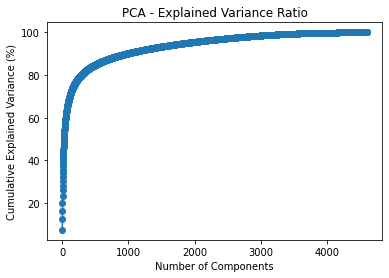

In [84]:
# Apply PCA
pca = PCA()
pca.fit(feature_matrix)

# Calculate explained variance ratio with percentages
explained_variance_ratio_percentage = np.cumsum(pca.explained_variance_ratio_) * 100

# Set the desired threshold for explained variance
# High Accuracy (Focus on retaining most information) Approach = 95
# Balanced Approach = 85
# Speed (Focus on dimension reduction) Approach = 70

threshold = 85

# Find the number of components needed to exceed the threshold
n_components = np.argmax(explained_variance_ratio_percentage >= threshold) + 1

# Display the result
print(f"Number of components to explain {threshold}% of variance: {n_components}")

# Optionally, you can plot the explained variance ratio
fig, ax = plt.subplots()
ax.plot(range(1, len(explained_variance_ratio_percentage) + 1), explained_variance_ratio_percentage, marker='o')

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('PCA - Explained Variance Ratio')
plt.show()

In [85]:
# Apply PCA
pca = PCA(n_components=n_components)
features_transformed = pca.fit_transform(feature_matrix)

features_transformed

array([[-0.70496904,  0.12456152,  1.08506657, ..., -0.04700171,
        -0.00548653,  0.0218186 ],
       [-0.30706543,  0.25152665,  1.20717382, ...,  0.01767122,
        -0.02298126,  0.01560796],
       [-1.09729914, -0.27996914,  0.80387414, ..., -0.00488095,
         0.00713528,  0.01721927],
       ...,
       [ 0.5126246 , -0.54052747, -0.58719217, ...,  0.00957898,
        -0.05090321, -0.01221936],
       [-0.29082381, -0.79177213,  0.12482382, ...,  0.00944317,
         0.04731126, -0.00493928],
       [ 1.91251382, -0.57743233,  0.02389594, ..., -0.00493058,
        -0.00908279,  0.0034    ]])

In [88]:
from sklearn.neighbors import NearestNeighbors

df['PCA_Features'] = list(features_transformed)

In [1]:
import pandas as pd

df = pd.read_pickle('sorting_df.pkl')

df

,Name,Premiered,Episodes,Rating,Genres,Synopsis,Studios,cluster,Score,Scored By,Weighted Score,PCA_Features,Image URL
0,Cowboy Bebop,spring 1998,26.0,R - 17+ (violence & profanity),"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",Sunrise,50,0.951724,0.343540,0.769269,"[-0.7049690372635099, 0.12456152098804234, 1.0...",https://cdn.myanimelist.net/images/anime/4/196...
1,Cowboy Bebop: Tengoku no Tobira,UNKNOWN,1.0,R - 17+ (violence & profanity),"Action, Sci-Fi","Another day, another bounty—such is the life o...",Bones,111,0.900690,0.077476,0.653726,"[-0.30706543472411724, 0.25152665084367093, 1....",https://cdn.myanimelist.net/images/anime/1439/...
2,Trigun,spring 1998,26.0,PG-13 - Teens 13 or older,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",Madhouse,3,0.878621,0.134034,0.655245,"[-1.0972991436280395, -0.2799691410553103, 0.8...",https://cdn.myanimelist.net/images/anime/7/203...
3,Witch Hunter Robin,summer 2002,26.0,PG-13 - Teens 13 or older,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,Sunrise,114,0.744828,0.016059,0.526197,"[-1.0681548426383387, -0.20905459257386702, 0....",https://cdn.myanimelist.net/images/anime/10/19...
4,Bouken Ou Beet,fall 2004,52.0,PG - Children,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,Toei Animation,74,0.702069,0.002373,0.492160,"[-0.5546495468517041, -0.041955374046641854, 0...",https://cdn.myanimelist.net/images/anime/7/215...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15688,Li Shi Zhentan Shiwusuo: A Day in Lungmen - Ho...,UNKNOWN,1.0,PG-13 - Teens 13 or older,"Action, Comedy, Mystery","Infiltrating, disguising, and raiding. Tonight...","HMCH, Gravity Well",7,0.571034,0.000011,0.399727,"[-0.4308317454925214, -0.49649072610297007, -0...",https://cdn.myanimelist.net/images/anime/1865/...
15689,Slash,UNKNOWN,1.0,PG-13 - Teens 13 or older,UNKNOWN,Music video for the song Slash by yama.\n\nThe...,UNKNOWN,86,0.634483,0.000020,0.444144,"[0.896836526971117, -0.48232887040747396, -0.3...",https://cdn.myanimelist.net/images/anime/1290/...
15690,The IDOLM@STER Cinderella Girls: U149 Recap,UNKNOWN,1.0,PG-13 - Teens 13 or older,UNKNOWN,Recap of the first seven episodes of The IDOLM...,CygamesPictures,52,0.582069,0.000005,0.407450,"[0.5126245962488502, -0.5405274716859377, -0.5...",https://cdn.myanimelist.net/images/anime/1597/...
15691,One Piece: Dai Gekisen Tokushuu! Hangeki Doume...,UNKNOWN,1.0,PG-13 - Teens 13 or older,"Action, Adventure, Comedy, Fantasy",This is the 8th recap special of the Wano arc.,UNKNOWN,23,0.612414,0.000083,0.428714,"[-0.29082380581797124, -0.7917721266713381, 0....",https://cdn.myanimelist.net/images/anime/1981/...


In [6]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

n_neighbors = 25
nn_model = NearestNeighbors(n_neighbors=n_neighbors, algorithm='ball_tree')
nn_model.fit(np.vstack(df['PCA_Features']))

NearestNeighbors(algorithm='ball_tree', n_neighbors=25)

In [36]:
import pickle

with open('nn_model.pkl', 'wb') as file:
    pickle.dump(nn_model, file)

In [34]:
# Assuming your dataframe is named 'anime_df'
# Replace 'YourAnimeName' with the anime name you want to query
query_anime_name = "Fumetsu no Anata e"

# Step 1: Query the anime by name
query_anime = df[df['Name'] == query_anime_name]

# Check if the anime is found
if not query_anime.empty:
    # Extract the cluster label of the query anime
    query_cluster = query_anime['cluster'].values[0]

    # Step 2: Filter other anime in the same cluster
    same_cluster_anime = df[df['cluster'] == query_cluster]

    # Step 3: Create a Nearest Neighbors model
    n_neighbors = 25
    nn_model = NearestNeighbors(n_neighbors=n_neighbors, algorithm='auto')
    nn_model.fit(same_cluster_anime['PCA_Features'].tolist())

    # Step 4: Perform a nearest neighbors query based on PCA features
    query_pca_features = query_anime['PCA_Features'].values[0].reshape(1, -1)
    distances, indices = nn_model.kneighbors(query_pca_features)

    # Step 5: Retrieve the nearest neighbors and sort by weighted score
    nearest_neighbors = same_cluster_anime.iloc[indices[0]]

    # Exclude the queried anime from the result
    nearest_neighbors = nearest_neighbors[nearest_neighbors['Name'] != query_anime_name]

    # Sort by weighted score
    sorted_neighbors = nearest_neighbors.sort_values(by='Weighted Score', ascending=False)

    # Display the result
    print(f"Nearest neighbors for '{query_anime_name}' sorted by weighted score:")
    print(sorted_neighbors[['Name', 'Weighted Score']])
else:
    print(f"Anime '{query_anime_name}' not found in the dataframe.")

Nearest neighbors for 'Fumetsu no Anata e' sorted by weighted score:
                                                    Name  Weighted Score
3918                                      Bakemonogatari        0.705697
10976                         Owarimonogatari 2nd Season        0.699400
7905                                      Hanamonogatari        0.613266
14669                        Fumetsu no Anata e Season 2        0.610849
6127                                  Mawaru Penguindrum        0.600886
14026                                Wonder Egg Priority        0.593901
9470     Kindaichi Shounen no Jikenbo Returns 2nd Season        0.559531
8069                Kindaichi Shounen no Jikenbo Returns        0.548245
12617  Lord El-Melloi II Sei no Jikenbo: Rail Zeppeli...        0.540722
302                                   Petshop of Horrors        0.523839
918                                   Le Chevalier D'Eon        0.517298
11494                                            Kokkok